In [2]:
import pandas as pd

In [5]:
# Read the CSV file
df = pd.read_csv('/kaggle/input/sbd-data/dataset.csv')

df.head()

,id,text,lemma,upos,xpos,head,deprel,start_char,end_char
0,1,اس,یہ,DET,DEM,2,det,0,2
1,2,سلسلے,سلسلہ,NOUN,NN,5,nmod,3,8
2,3,کی,کا,ADP,PSP,2,case,9,11
3,4,دیگر,دیگر,ADJ,JJ,5,amod,12,16
4,5,اقساط,اقساط,NOUN,NN,7,nsubj,17,22


In [6]:
data = df.drop(columns=['id'])

In [7]:
data['y'] = data['text'].apply(lambda x: 1 if x in ['۔'] else 0)

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [9]:
# One-hot encode 'upos', 'xpos', and 'deprel'
encoder = OneHotEncoder(sparse=False)
encoded_cats = encoder.fit_transform(data[['upos', 'xpos', 'deprel']])

# Convert to DataFrame for easier merging
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out())

# Concatenate encoded features back to the dataset
data = pd.concat([data.reset_index(drop=True), encoded_cats_df], axis=1)

# Drop the original categorical columns (optional)
data = data.drop(columns=['upos', 'xpos', 'deprel'])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
# Select the numerical features to normalize
numerical_features = ['start_char', 'end_char', 'head']

# Option 2: Standard Scaling (zero mean and unit variance)
standard_scaler = StandardScaler()
data[numerical_features] = standard_scaler.fit_transform(data[numerical_features])

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine text and lemma columns into a single string representation (if needed)
data['text_lemma'] = data['text'] + " " + data['lemma']

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Adjust max_features as needed

# Fit and transform the combined text and lemma
tfidf_features = tfidf_vectorizer.fit_transform(data['text_lemma'])

# Convert the sparse matrix to a DataFrame for better integration
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Add the TF-IDF features back to the original DataFrame
data = pd.concat([data.reset_index(drop=True), tfidf_df], axis=1)

# Drop the original text and lemma columns (optional)
data = data.drop(columns=['text', 'lemma', 'text_lemma'])

In [14]:
data

,head,start_char,end_char,y,upos_ADJ,upos_ADP,upos_ADV,upos_AUX,upos_CCONJ,upos_DET,...,ہوں,ہی,ہیں,ہے,یا,یعنی,یقینا,یہ,یہاں,یہی
0,-1.051740,-1.732661,-1.732666,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.646811,0.0,0.0
1,-0.857181,-1.732652,-1.732647,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,-1.051740,-1.732634,-1.732638,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,-0.857181,-1.732625,-1.732623,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,-0.727474,-1.732609,-1.732604,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254923,2.580032,1.737197,1.737196,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
254924,1.672089,1.737209,1.737214,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
254925,2.580032,1.737228,1.737236,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
254926,2.580032,1.737249,1.737245,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [17]:
# Define the feature matrix (drop 'y') and target
X = data.drop(columns=['y'])
y = data['y']

In [28]:
# Split into training (64%), validation (16%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.36, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.56, random_state=42, stratify=y_temp)


In [24]:
# Define the DNN model
model = tf.keras.Sequential([
    # Input layer
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),

    # Hidden layers
    tf.keras.layers.Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    tf.keras.layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    tf.keras.layers.Dense(64, activation='relu'),  # Second hidden layer with 64 neurons
    tf.keras.layers.Dropout(0.5),  # Dropout layer

    # Output layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,433 (322.00 KB)

 Trainable params: 82,433 (322.00 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
6374/6374 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9761 - loss: 0.0525 - val_accuracy: 0.9818 - val_loss: 0.0347
Epoch 2/10
6374/6374 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9810 - loss: 0.0358 - val_accuracy: 0.9817 - val_loss: 0.0347
Epoch 3/10
6374/6374 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9818 - loss: 0.0351 - val_accuracy: 0.9817 - val_loss: 0.0348
Epoch 4/10
6374/6374 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9813 - loss: 0.0354 - val_accuracy: 0.9822 - val_loss: 0.0345
Epoch 5/10
6374/6374 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9820 - loss: 0.0346 - val_accuracy: 0.9814 - val_loss: 0.0349
Epoch 6/10
6374/6374 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9816 - loss: 0.0348 - val_accuracy: 0.9818 - val_loss: 0.0345
Epoch 7/10
6374/6374 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9817 - loss: 0.0343 - val_accuracy: 0.9822 - val_loss: 0.0344
Epoch 8/10
6374/6374 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9818 - loss: 0

In [29]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

1607/1607 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9832 - loss: 0.0327
Test Loss: 0.0334
Test Accuracy: 0.9830


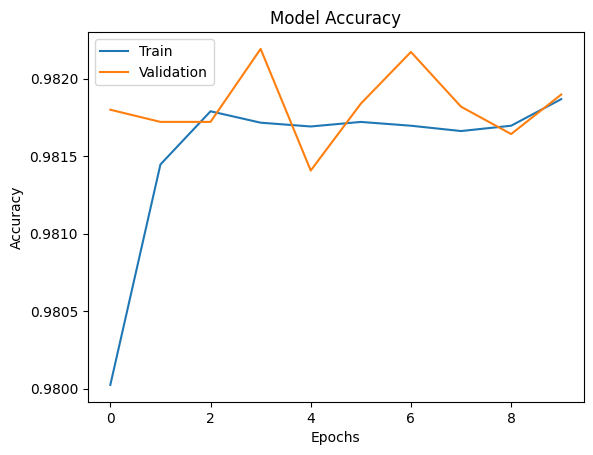

In [31]:
import matplotlib.pyplot as plt
# Visualize training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

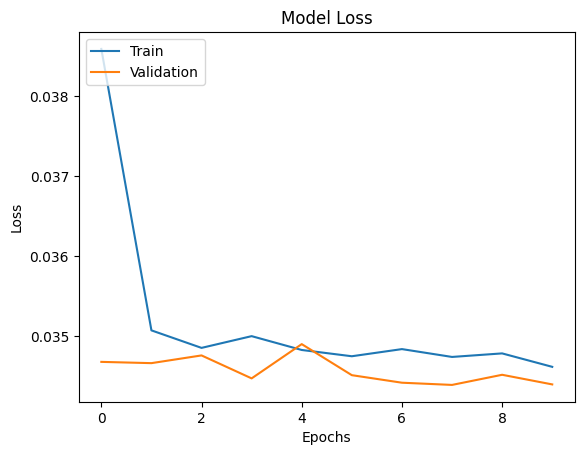

In [32]:
# Visualize training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
# Predict on the test set
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert to binary predictions (0 or 1)


1607/1607 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [35]:
from sklearn.metrics import classification_report, confusion_matrix
# Print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     49562
           1       0.70      0.92      0.79      1833

    accuracy                           0.98     51395
   macro avg       0.85      0.95      0.89     51395
weighted avg       0.99      0.98      0.98     51395



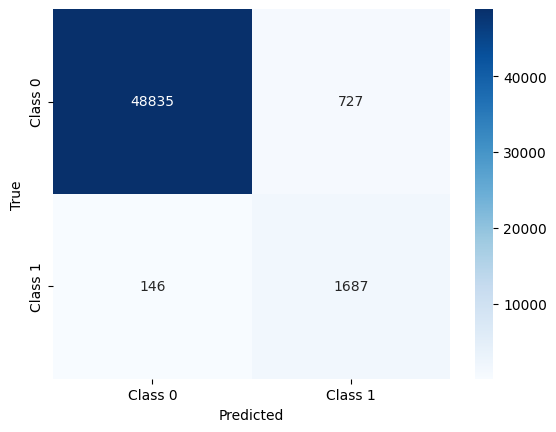

In [37]:
import seaborn as sns
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()